<a href="https://colab.research.google.com/github/ahamedistiaque/Handwritten-digits-classification-ANN/blob/main/Federated_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Federated learning is a machine learning on a decentralized data.In FL, the data is stored on the devices of the clients, and the model is trained in a distributed manner. The clients train the model on their local data, and then the updates are aggregated on a central server to produce a global model. FL is useful in situations where the data is sensitive and cannot be centralized. [Federated learning](https://federated.withgoogle.com)

important algoorithm:

1. [Federated Averaging](https://youtu.be/xJkY3ehX_MI)
2. Federated Stochastic Gradient Descent
3. Federated Proximal Gradient Descent
4. Federated SGD with Local Updates
5. Federated Momentum SGD
6. Federated Learning with Non-IID Data
7. Federated Multi-Task Learning
8. Federated Transfer Learning
9. Federated Dropout
10.Federated Meta-Learning



In [1]:

!pip uninstall --upgrade jax==0.4.8
!pip uninstall --upgrade cachetools==4.2.1
!pip uninstall --upgrade portpicker==1.3.1
!pip uninstall --upgrade cachetools==4.2.1
!pip uninstall --upgrade scipy==1.8.0




Usage:   
  pip3 uninstall [options] <package> ...
  pip3 uninstall [options] -r <requirements file> ...

no such option: --upgrade

Usage:   
  pip3 uninstall [options] <package> ...
  pip3 uninstall [options] -r <requirements file> ...

no such option: --upgrade

Usage:   
  pip3 uninstall [options] <package> ...
  pip3 uninstall [options] -r <requirements file> ...

no such option: --upgrade

Usage:   
  pip3 uninstall [options] <package> ...
  pip3 uninstall [options] -r <requirements file> ...

no such option: --upgrade

Usage:   
  pip3 uninstall [options] <package> ...
  pip3 uninstall [options] -r <requirements file> ...

no such option: --upgrade


In [2]:
import tensorflow as tf
print(tf.__version__)


2.12.0


In [3]:
!python --version


Python 3.10.11


In [4]:
!pip install --quiet --upgrade tensorflow-federated

In [5]:
import tensorflow_federated as tff


In [17]:
import collections
import matplotlib.pyplot as plt 
import numpy as np
import tensorflow as tf


In [6]:
emnist_train, emnist_test = tff.simulation.datasets.emnist.load_data()

In [14]:
print("emnist_train :",len(emnist_train.client_ids))
print("emnist_test  :",len(emnist_test.client_ids))


emnist_train : 3383
emnist_test  : 3383


In [20]:
example_dataset = emnist_train.create_tf_dataset_for_client(
    emnist_train.client_ids[0])

example_element = next(iter(example_dataset))

example_element['label'].numpy()

1

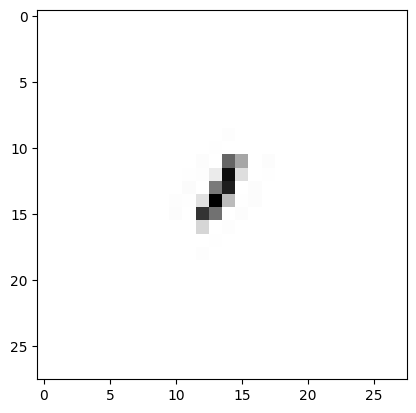

In [21]:
from matplotlib import pyplot as plt
plt.imshow(example_element['pixels'].numpy(), cmap='gray', aspect='equal')
plt.grid(False)
_ = plt.show()

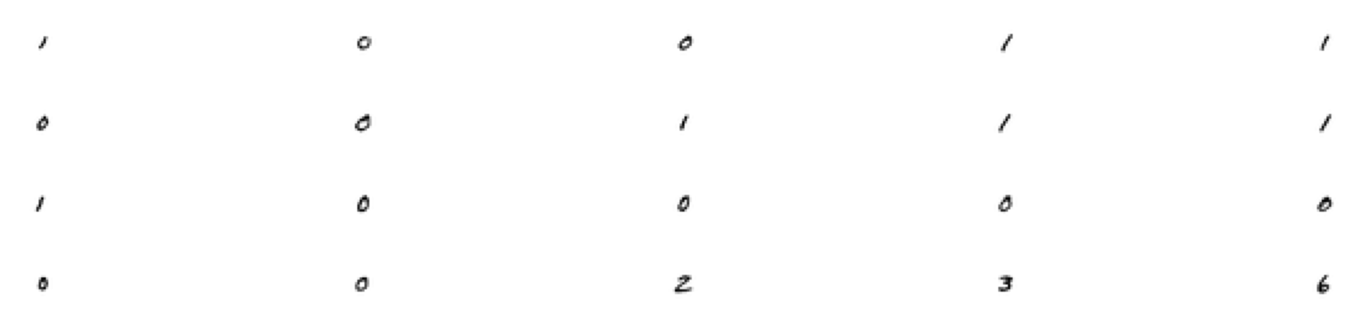

In [30]:
## Example MNIST digits for one client
figure = plt.figure(figsize=(20, 4))
j = 0

for example in example_dataset.take(20):
  plt.subplot(4, 5, j+1)
  plt.imshow(example['pixels'].numpy(), cmap='gray', aspect='equal')
  plt.axis('off')
  j += 1

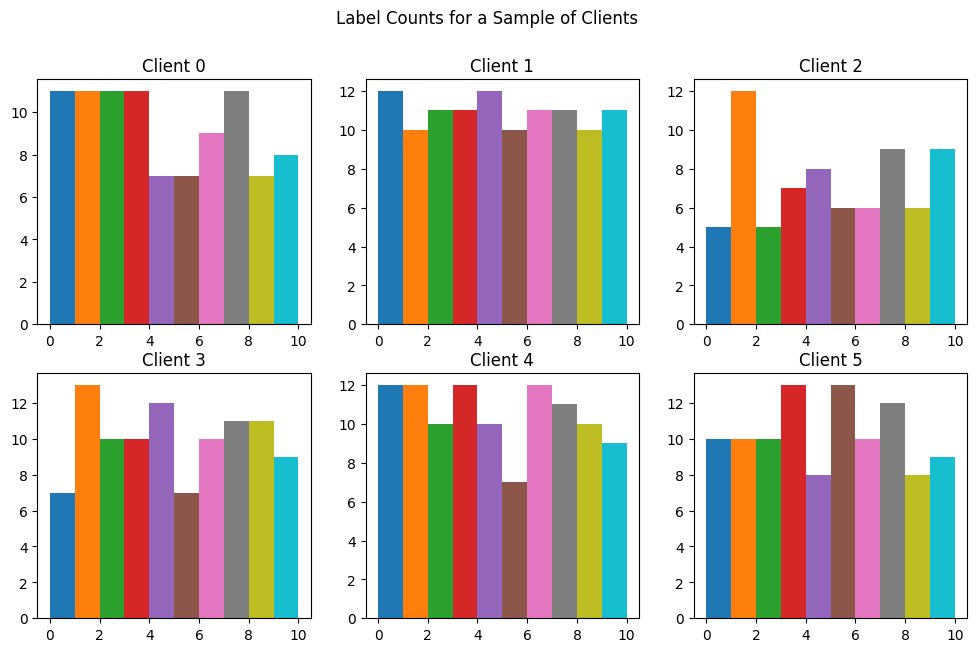

In [24]:
# Number of examples per layer for a sample of clients
f = plt.figure(figsize=(12, 7))
f.suptitle('Label Counts for a Sample of Clients')
for i in range(6):
  client_dataset = emnist_train.create_tf_dataset_for_client(
      emnist_train.client_ids[i])
  plot_data = collections.defaultdict(list)
  for example in client_dataset:
    # Append counts individually per label to make plots
    # more colorful instead of one color per plot.
    label = example['label'].numpy()
    plot_data[label].append(label)
  plt.subplot(2, 3, i+1)
  plt.title('Client {}'.format(i))
  for j in range(10):
    plt.hist(
        plot_data[j],
        density=False,
        bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [25]:
def client_data(n):
  return emnist_train.create_tf_dataset_for_client(source.client_ids[n]).map(
      lambda e: (tf.reshape(e['pixels'], [-1]), e['label'])
  ).repeat(10).batch(20)

In [27]:
def model_fn():

        keras_model = create_keras_model()

        return tff.learning.from_keras_model(keras_model, sample_batch)

In [29]:
train = tff.learning.build_federated_averaging_process(model_fn)
state = train.initialize() 


for _ in range (5):
  state, metrics = train.next(state, train_data)
  print (metrics.loss) 


eval = tff.learning.build_federated_evaluation(model_fn)
metrics = eval(state.model, test_data)

AttributeError: ignored